#Metode Deteksi Tepi - Tugas 4 Computer Vision

---


- **Nama** : Muhammad Aditya Bayhaqie
- **NIM** : 090212822271222
- **Universitas** : Universitas Sriwijaya

##Import Libraries

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow # for image display in Colab
import matplotlib.pyplot as plt

`cv2`: OpenCV library yang digunakan untuk Pengolahan Citra.

`numpy`: Untuk operasi numerikal dalam larik.

`cv2_imshow` is specifically used for image display in Google Colab because normal `cv2.imshow()` will not work.

In [ ]:
image = cv2.imread('/content/drive/MyDrive/Misc./FB_IMG_1726550246702.jpg', cv2.IMREAD_GRAYSCALE)

##Edge Detection Operators

---


(-0.5, 1023.5, 1041.5, -0.5)

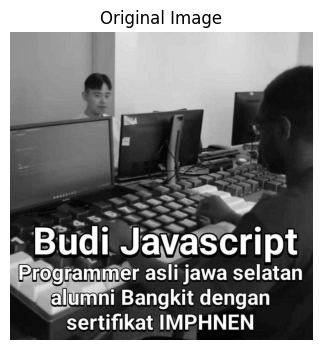

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(4, 4))

# Original Image
ax.imshow(image, cmap='gray')
ax.set_title('Original Image')
ax.axis('off')

###Operator Sobel

**Operator Sobel** menghitung gradien **Intensitas Citra** pada arah *horizontal (x)* dan *vertikal (y)* menggunakan kernel 3x3. Kernel ini mengukur perbedaan **Intensitas Piksel** di sekitar piksel target.

In [ ]:
sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=5)  # x-direction
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=5)  # y-direction
sobel_edges = cv2.magnitude(sobel_x, sobel_y) # Combine x and y edges

sobel_x1 = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=21)  # x-direction
sobel_y1 = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=21)  # y-direction
sobel_edges1 = cv2.magnitude(sobel_x, sobel_y) # Combine x and y edges

(-0.5, 1023.5, 1041.5, -0.5)

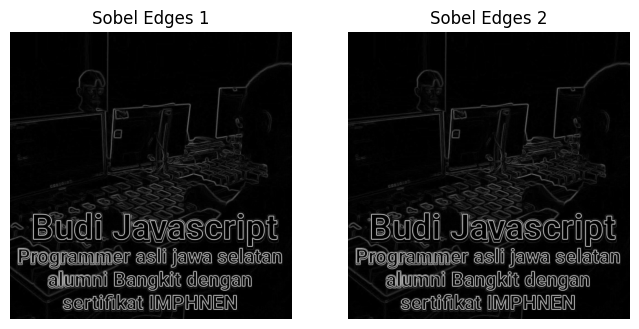

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(8, 8)) # Changed to 1 row, 2 columns

# Sobel Edges Image
ax[0].imshow(sobel_edges, cmap='gray')
ax[0].set_title('Sobel Edges 1')
ax[0].axis('off')

# Sobel Edges Image
ax[1].imshow(sobel_edges1, cmap='gray')
ax[1].set_title('Sobel Edges 2')
ax[1].axis('off')

####**Analisis**
Sobel efektif dalam mendeteksi tepi yang kuat dan jelas, terutama tepi vertikal dan horizontal. Kelemahannya adalah sensitif terhadap noise dan dapat menghasilkan tepi yang tebal.

---

####**Review Output**
Sobel menghasilkan tepi yang relatif tebal dan terkadang tidak beratur. Tepi vertikal dan horizontal terdeteksi dengan baik, tetapi tepi diagonal mungkin kurang jelas.

###Operator Prewitt

Mirip dengan Sobel, Prewitt juga menggunakan kernel 3x3 untuk menghitung gradien intensitas. **Perbedaannya terletak pada bobot kernel yang digunakan**. Prewitt memberikan **Bobot yang Sama** untuk semua piksel di sekitar piksel target.

In [ ]:
kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
prewitt_x = cv2.filter2D(image, cv2.CV_64F, kernelx)
prewitt_y = cv2.filter2D(image, cv2.CV_64F, kernely)
prewitt_edges = cv2.magnitude(prewitt_x, prewitt_y)

(-0.5, 1023.5, 1041.5, -0.5)

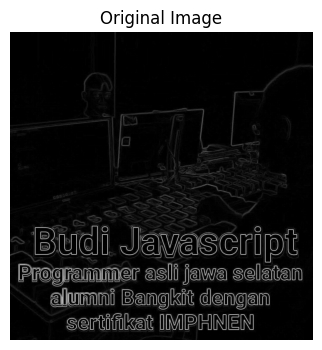

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(4, 4))

# Original Image
ax.imshow(prewitt_edges, cmap='gray')
ax.set_title('Prewitt Edges')
ax.axis('off')

####**Analisis**
Prewitt kurang sensitif terhadap noise dibandingkan Sobel, sehingga menghasilkan tepi yang lebih halus. Namun, Prewitt mungkin kurang akurat dalam mendeteksi tepi yang lemah.

---

####**Review Output**
Prewitt menghasilkan tepi yang lebih tipis dan halus dibandingkan Sobel. Noise lebih sedikit terlihat, tetapi beberapa tepi yang lemah mungkin terlewatkan.

###Operator Roberts

Roberts menggunakan **Kernel 2x2** yang lebih sederhana untuk **menghitung gradien**. Kernel ini fokus pada **perbedaan intensitas** antara **piksel diagonal**.

In [ ]:
kernelx = np.array([[1, 0], [0, -1]])
kernely = np.array([[0, 1], [-1, 0]])
roberts_x = cv2.filter2D(image, cv2.CV_64F, kernelx)
roberts_y = cv2.filter2D(image, cv2.CV_64F, kernely)
roberts_edges = cv2.magnitude(roberts_x, roberts_y)

(-0.5, 1023.5, 1041.5, -0.5)

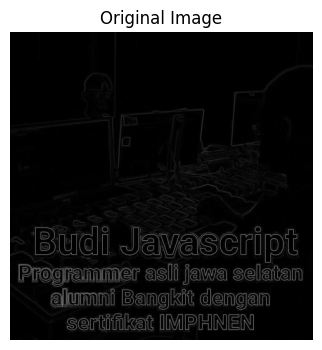

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(4, 4))

# Roberts Edge Image
ax.imshow(roberts_edges, cmap='gray')
ax.set_title('Robets Edges')
ax.axis('off')

####**Analisis**
Roberts cepat dan efisien karena kernelnya yang kecil. Namun, Roberts sangat sensitif terhadap noise dan hanya mendeteksi tepi yang sangat tajam.

---

####**Review Output**
Roberts menghasilkan tepi yang tipis dan terkadang terputus-putus. Noise sangat terlihat, dan tepi yang tidak terlalu tajam mungkin tidak terdeteksi dengan baik.

###Operator Canny

Canny adalah operator deteksi tepi yang lebih kompleks dan canggih. Ia melibatkan beberapa tahapan, termasuk **penghalusan citra**, **pencarian gradien**, **penipisan tepi** (*non-maximum suppression*), dan *hysteresis thresholding*.

In [ ]:
canny_edges1 = cv2.Canny(image, 50, 100)
canny_edges2 = cv2.Canny(image, 100, 200)

(-0.5, 1023.5, 1041.5, -0.5)

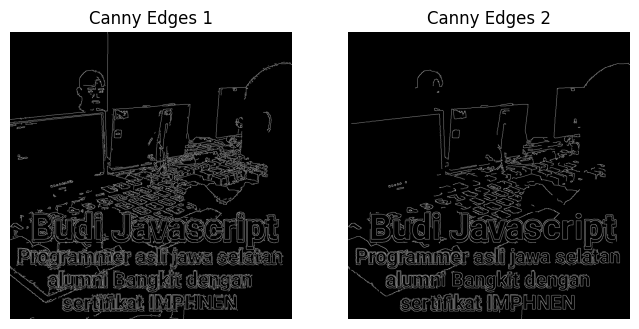

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(8, 4)) # Changed to 1 row, 2 columns

# Canny Edges Image
ax[0].imshow(canny_edges1, cmap='gray')
ax[0].set_title('Canny Edges 1')
ax[0].axis('off')

# Canny Edges Image
ax[1].imshow(canny_edges2, cmap='gray')
ax[1].set_title('Canny Edges 2')
ax[1].axis('off')

###Result

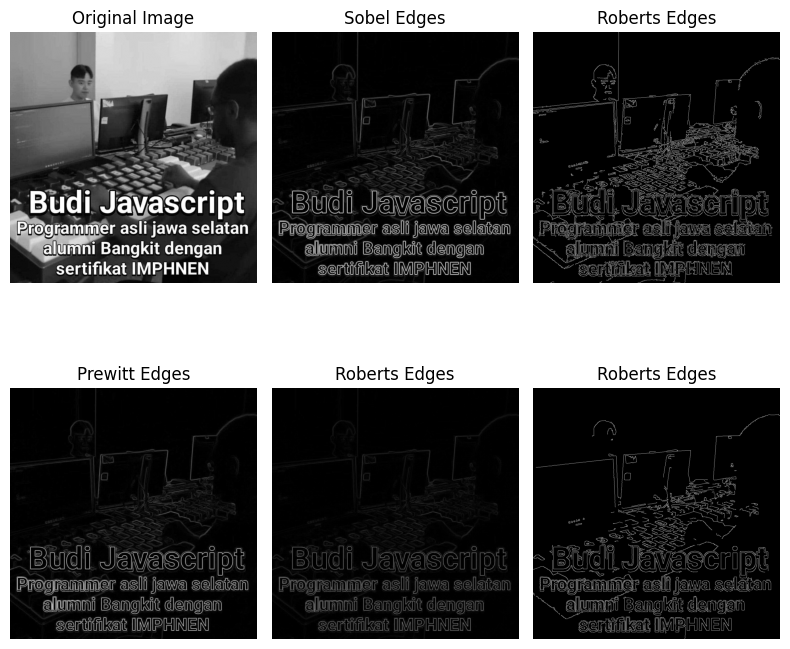

In [ ]:
# Display Results with Framing
fig, axes = plt.subplots(2, 3, figsize=(8, 8))  # Create a 2x2 grid of subplots

# Original Image
axes[0, 0].imshow(image, cmap='gray')
axes[0, 0].set_title('Original Image')
axes[0, 0].axis('off')  # Turn off axis ticks

# Sobel Edges
axes[0, 1].imshow(sobel_edges, cmap='gray')
axes[0, 1].set_title('Sobel Edges')
axes[0, 1].axis('off')

# Prewitt Edges
axes[1, 0].imshow(prewitt_edges, cmap='gray')  # Changed to axes[1, 0]
axes[1, 0].set_title('Prewitt Edges')
axes[1, 0].axis('off')

# Roberts Edges
axes[1, 1].imshow(roberts_edges, cmap='gray')  # Changed to axes[1, 1]
axes[1, 1].set_title('Roberts Edges')
axes[1, 1].axis('off')

# Canny1 Edges
axes[0, 2].imshow(canny_edges1, cmap='gray')  # Changed to axes[1, 1]
axes[0, 2].set_title('Roberts Edges')
axes[0, 2].axis('off')

# Canny2 Edges
axes[1, 2].imshow(canny_edges2, cmap='gray')  # Changed to axes[1, 1]
axes[1, 2].set_title('Roberts Edges')
axes[1, 2].axis('off')


plt.tight_layout()  # Adjust spacing between subplots
plt.show()

#**Kesimpulan Analisis dan Perbedaan Operator Deteksi Tepi**
Kode tersebut menerapkan beberapa operator deteksi tepi (*Sobel*, *Prewitt*, *Roberts*, dan *Canny*) pada citra dan menampilkan hasilnya.

Secara Singkat, tiap Operator ini Memiliki kelebihan dan kekurangan yaitu

- Sobel dan Prewitt relatif mirip, tetapi Sobel lebih sensitif terhadap noise karena parameter Sobel (`ksize`) yang bisa dimodifikasi dengan catatan.
  - Angka `ksize` wajib dibawah 31
  - `ksize`wajib berangka ganjil
- Roberts paling sederhana dan cepat, tetapi sangat sensitif terhadap noise dan hanya mendeteksi tepi yang tajam.
- Canny paling canggih dan memberikan hasil terbaik secara keseluruhan, tetapi lebih kompleks untuk diimplementasikan.